例によってお題は[これ](https://qiita.com/ashitani/items/1dc0a54da218ec224ad8)

MXNetはjupyterだと出力がブロッキングされるのであまりjupyter向きではないかもしれない。

NNVMでコンパイルする例が[こちら](https://github.com/ashitani/nnvm_example)


In [1]:
from mxnet import gluon
from mxnet.gluon import nn

class Net(gluon.HybridBlock):
    def __init__(self, **kwargs):
        super(Net, self).__init__(**kwargs)
        with self.name_scope():
            self.fc1 = nn.Dense(64)
            self.fc2 = nn.Dense(256)
            self.fc3 = nn.Dense(1)

    def hybrid_forward(self, F, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        y = self.fc3(h)
        return y


In [2]:

import mxnet as mx
from mxnet import autograd
import logging
logging.getLogger().setLevel(logging.DEBUG)

import numpy as np

model=Net()
model.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())

def get_batch(n):
    x = np.random.random(n)
    y = np.exp(x)
    return x,y

trainer = gluon.Trainer(model.collect_params(), 'adam')

for i in range(10000):
    with autograd.record():
        x,y = get_batch(100)
        data = mx.nd.array(x).reshape((100,1))
        label = mx.nd.array(y).reshape((100,1))
        output = model(data)
        L = gluon.loss.L2Loss(batch_axis=1) #?!
        loss = L(output, label)
        print loss.asnumpy()
        loss.backward()

    trainer.step(data.shape[0])

#model.save_params('model')


[ 1.71686006]
[ 1.52220607]
[ 1.38557863]
[ 1.3023839]
[ 1.19111514]
[ 1.15459776]
[ 1.20196593]
[ 0.94772118]
[ 0.99150431]
[ 0.92430025]
[ 0.97993743]
[ 0.79469824]
[ 0.79066223]
[ 0.70177442]
[ 0.68953013]
[ 0.59877068]
[ 0.53856844]
[ 0.51583719]
[ 0.45388386]
[ 0.36892378]
[ 0.32388374]
[ 0.29370672]
[ 0.25807425]
[ 0.21946225]
[ 0.170984]
[ 0.13573982]
[ 0.0987259]
[ 0.07338759]
[ 0.05295986]
[ 0.04161259]
[ 0.02743641]
[ 0.01554876]
[ 0.01060203]
[ 0.01199258]
[ 0.01522433]
[ 0.01948921]
[ 0.02277691]
[ 0.03173344]
[ 0.03021892]
[ 0.04233071]
[ 0.04059142]
[ 0.04771456]
[ 0.03963786]
[ 0.0378659]
[ 0.03634846]
[ 0.02900363]
[ 0.02741053]
[ 0.02406692]
[ 0.02085011]
[ 0.0173042]
[ 0.01456278]
[ 0.01130359]
[ 0.01138476]
[ 0.01071177]
[ 0.00689166]
[ 0.01039649]
[ 0.00737449]
[ 0.01103253]
[ 0.00876269]
[ 0.01091347]
[ 0.01429938]
[ 0.0114399]
[ 0.00860289]
[ 0.00958058]
[ 0.01215759]
[ 0.00929515]
[ 0.01139684]
[ 0.00954478]
[ 0.00842433]
[ 0.00938641]
[ 0.0062386]
[ 0.0051146]
[

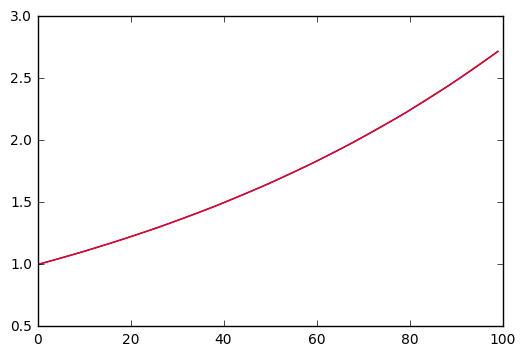

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

eval_data=np.linspace(0,1,100)

outs=np.array([])
for x in eval_data:
    out = model(mx.nd.array([x])).asnumpy()
    outs=np.append(outs,out)

plt.plot(np.exp(eval_data))
plt.plot(outs,"r")

plt.show()
